<a href="https://colab.research.google.com/github/CodeByHarri/Australian-Economic-Indicator-Data/blob/main/Australian_Economic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install selenium
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.abs.gov.au/statistics/economy/key-indicators"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all anchor tags with links
links = soup.find_all('a', href=True)

# Filter out the links to the tables
table_links = ['https://www.abs.gov.au' + link['href'] for link in links if "/statistics/economy/" in link['href']]
table_links = list(set(table_links))

for link in table_links:
    print(link)


https://www.abs.gov.au/statistics/economy/business-indicators/business-indicators-australia/jun-2023
https://www.abs.gov.au/statistics/economy/international-trade/international-trade-goods-and-services-australia/jun-2023
https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/wage-price-index-australia/jun-2023
https://www.abs.gov.au/statistics/economy/finance/lending-indicators/jul-2023
https://www.abs.gov.au/statistics/economy/international-trade/balance-payments-and-international-investment-position-australia/mar-2023
https://www.abs.gov.au/statistics/economy/business-indicators/private-new-capital-expenditure-and-expected-expenditure-australia/jun-2023
https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/international-trade-price-indexes-australia/jun-2023
https://www.abs.gov.au/statistics/economy/national-accounts/australian-national-accounts-national-income-expenditure-and-product/mar-2023
https://www.abs.gov.au/statistics/economy/price-indexes-and-

In [3]:
paths = []
for i in table_links:
  path = os.path.join('/content/',i.split('/')[-2])
  paths.append(path)

  # Check whether the specified path exists or not
  isExist = os.path.exists(path)
  if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")


The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!


In [4]:
# Add the directory containing chromedriver to the PATH environment variable
os.environ["PATH"] += os.pathsep + os.path.dirname(os.path.abspath('./chromedriver'))

for URL, p in zip(table_links,paths):
  os.chdir(p)
  print('Downloading: ', p)
  # Set Chrome options for headless mode and other necessary flags
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument("--headless")
  chrome_options.add_argument("--no-sandbox")
  chrome_options.add_argument("--disable-dev-shm-usage")

  # Set up the selenium driver with the options
  driver = webdriver.Chrome(options=chrome_options)
  driver.get(URL)

  # Wait for the page to load
  wait = WebDriverWait(driver, 10)
  buttons = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//ul/li/ul/li/button")))

  for button in buttons:
      driver.execute_script("arguments[0].click();", button)

  driver.quit()

  print("Finished downloading CSV files.")


Downloading:  /content/business-indicators-australia
Finished downloading CSV files.
Downloading:  /content/international-trade-goods-and-services-australia
Finished downloading CSV files.
Downloading:  /content/wage-price-index-australia
Finished downloading CSV files.
Downloading:  /content/lending-indicators
Finished downloading CSV files.
Downloading:  /content/balance-payments-and-international-investment-position-australia
Finished downloading CSV files.
Downloading:  /content/private-new-capital-expenditure-and-expected-expenditure-australia
Finished downloading CSV files.
Downloading:  /content/international-trade-price-indexes-australia
Finished downloading CSV files.
Downloading:  /content/australian-national-accounts-national-income-expenditure-and-product
Finished downloading CSV files.
Downloading:  /content/consumer-price-index-australia
Finished downloading CSV files.
Downloading:  /content/producer-price-indexes-australia
Finished downloading CSV files.


In [5]:
import os
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)
path_to_json = '/content/*/'
json_pattern = os.path.join(path_to_json,'*.csv')
file_list = glob.glob(json_pattern)

sub = ['/content/australian-national-accounts-national-income-expenditure-and-product/State compensation of employees, current prices, seasonally adjusted.csv',
 '/content/australian-national-accounts-national-income-expenditure-and-product/Gross value added by industry, chain volume measures, seasonally adjusted.csv',
 '/content/wage-price-index-australia/Annual and quarterly movement - states and territories (a).csv',
 '/content/wage-price-index-australia/Annual and quarterly movement - main contributors (a)(b).csv',
 '/content/consumer-price-index-australia/Selected services, annual movement (%).csv',
 '/content/consumer-price-index-australia/Food and non-alcoholic beverages, Australia, quarterly and annual movement (%).csv',
 '/content/consumer-price-index-australia/Rents, quarterly and annual movement (%).csv',
 '/content/consumer-price-index-australia/Tradables and non-tradables, Australia, quarterly and annual movement (%).csv']


file_list = [item for item in file_list if item not in sub]
file_list



['/content/business-indicators-australia/Rental, hiring and real estate services, Chain volume measures.csv',
 '/content/business-indicators-australia/Retail trade, Chain volume measures.csv',
 '/content/business-indicators-australia/Administrative and support services, Chain volume measures.csv',
 '/content/business-indicators-australia/Education and training, Current prices.csv',
 '/content/business-indicators-australia/Electricity, gas, water and waste services, Chain volume measures.csv',
 '/content/business-indicators-australia/Financial and insurance services, Chain volume measures.csv',
 '/content/business-indicators-australia/Accommodation and food services, Current prices.csv',
 '/content/business-indicators-australia/Transport, postal and warehousing, Current prices.csv',
 '/content/business-indicators-australia/Accommodation and food services, Chain volume measures.csv',
 '/content/business-indicators-australia/Transport, postal and warehousing, Chain volume measures.csv',
 

In [22]:
fd = pd.DataFrame()
for i in file_list[:-4]:
  try:
    print(i)
    topic = i.split('/')[3].replace(',','')[:-4]
    temp  = pd.read_csv(i,header=1,skipfooter=1,engine='python')
    temp.columns = ["Date" if "Unnamed: 0" in x else str(x) + ' ' +topic for x in temp.columns.tolist()]
    for col in temp.columns.tolist()[1:]:
      try:
        temp[col] = pd.to_numeric([float(x.replace(',','').replace(' ','')) for x in temp[col]], errors='coerce', downcast='float')
      except:
        try:
          temp[col] = pd.to_numeric(temp[col], errors='coerce', downcast='float')
        except:
          print('pass: ', col)
          pass

    ## try and except but in a for loop
    try:
      temp['Date'] = pd.to_datetime(temp['Date'], format='%b-%y')
    except:
      pass
    try:
      temp['Date'] = pd.to_datetime(temp['Date'], format='%b %y')
    except:
      pass
    fd = pd.concat([fd,temp])
  except:
    print('\n Failed: ', i)
    pass


fd['Date'] = pd.to_datetime(fd['Date'], errors='coerce', format='%b %Y')
fd['Date'].fillna(pd.to_datetime(fd['Date'], errors='coerce', format='%b-%y'), inplace=True)
fd = fd.groupby('Date').agg(lambda x: x.dropna().iloc[0] if not x.dropna().empty else None)

/content/business-indicators-australia/Rental, hiring and real estate services, Chain volume measures.csv
/content/business-indicators-australia/Retail trade, Chain volume measures.csv
/content/business-indicators-australia/Administrative and support services, Chain volume measures.csv
/content/business-indicators-australia/Education and training, Current prices.csv
/content/business-indicators-australia/Electricity, gas, water and waste services, Chain volume measures.csv
/content/business-indicators-australia/Financial and insurance services, Chain volume measures.csv
/content/business-indicators-australia/Accommodation and food services, Current prices.csv
/content/business-indicators-australia/Transport, postal and warehousing, Current prices.csv
/content/business-indicators-australia/Accommodation and food services, Chain volume measures.csv
/content/business-indicators-australia/Transport, postal and warehousing, Chain volume measures.csv
/content/business-indicators-australia/Mi

In [42]:
fd.tail(10)

,Seasonally adjusted Sales ($m) Rental hiring and real estate services Chain volume measures,Seasonally adjusted Sales ($m) Retail trade Chain volume measures,Seasonally adjusted Inventories ($m) Retail trade Chain volume measures,Seasonally adjusted Sales ($m) Administrative and support services Chain volume measures,Seasonally adjusted Wages ($m) Education and training Current prices,Seasonally adjusted Sales ($m) Electricity gas water and waste services Chain volume measures,Seasonally adjusted Inventories ($m) Electricity gas water and waste services Chain volume measures,Seasonally adjusted Sales ($m) Financial and insurance services Chain volume measures,Seasonally adjusted Wages ($m) Accommodation and food services Current prices,Seasonally adjusted CGOP ($m) Accommodation and food services Current prices,Seasonally adjusted Wages ($m) Transport postal and warehousing Current prices,Seasonally adjusted CGOP ($m) Transport postal and warehousing Current prices,Seasonally adjusted Sales ($m) Accommodation and food services Chain volume measures,Seasonally adjusted Inventories ($m) Accommodation and food services Chain volume measures,Seasonally adjusted Sales ($m) Transport postal and warehousing Chain volume measures,Seasonally adjusted Wages ($m) Mining Current prices,Seasonally adjusted CGOP ($m) Mining Current prices,Seasonally adjusted Wages ($m) Wholesale trade Current prices,Seasonally adjusted CGOP ($m) Wholesale trade Current prices,Seasonally adjusted Sales ($m) Other services Chain volume measures,Seasonally adjusted Sales ($m) Construction Chain volume measures,Seasonally adjusted Sales ($m) Manufacturing Chain volume measures,Seasonally adjusted Inventories ($m) Manufacturing Chain volume measures,Seasonally adjusted Wages ($m) Financial and insurance services Current prices,Seasonally adjusted CGOP ($m) Financial and insurance services Current prices,Seasonally adjusted Wages ($m) Retail trade Current prices,Seasonally adjusted CGOP ($m) Retail trade Current prices,Seasonally adjusted Inventories ($m) Total industry Chain volume measures (a),Seasonally adjusted Wages ($m) Construction Current prices,Seasonally adjusted CGOP ($m) Construction Current prices,Seasonally adjusted Wages ($m) Rental hiring and real estate services Current prices,Seasonally adjusted CGOP ($m) Rental hiring and real estate services Current prices,Seasonally adjusted Wages ($m) Administrative and support services Current prices,Seasonally adjusted CGOP ($m) Administrative and support services Current prices,Seasonally adjusted Wages ($m) Information media and telecommunications Current prices,Seasonally adjusted CGOP ($m) Information media and telecommunications Current prices,Quarterly (%) Company gross operating profits seasonally adjusted estimates,Year on Year (%) Company gross operating profits seasonally adjusted estimates,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,Seasonally adjusted CGOP ($m) Professional scientific and technical services Current prices,Seasonally adjusted Sales ($m) Professional scientific and technical services Chain volume measures,Seasonally adjusted Wages ($m) Total industry Current prices,Seasonally adjusted CGOP ($m) Total industry Current prices,Seasonally adjusted Sales ($m) Mining Chain volume measures,Seasonally adjusted Inventories ($m) Mining Chain volume measures,Seasonally adjusted Sales ($m) Information media and telecommunications Chain volume measures,Seasonally adjusted Sales ($m) Arts and recreation services Chain volume measures,Seasonally adjusted Wages ($m) Arts and recreation services Current prices,Seasonally adjusted CGOP ($m) Arts and recreation services Current prices,Seasonally adjusted Sales ($m) Wholesale trade Chain volume measures,Seasonally adjusted Inventories ($m) Wholesale trade Chain volume measures,Seasonally adjusted Wages ($m) Other services Current prices,Seasonally adjusted CGOP ($m) Other services Current prices,Quar

In [26]:
fd.to_csv('/content/sample_data/econ data.csv')

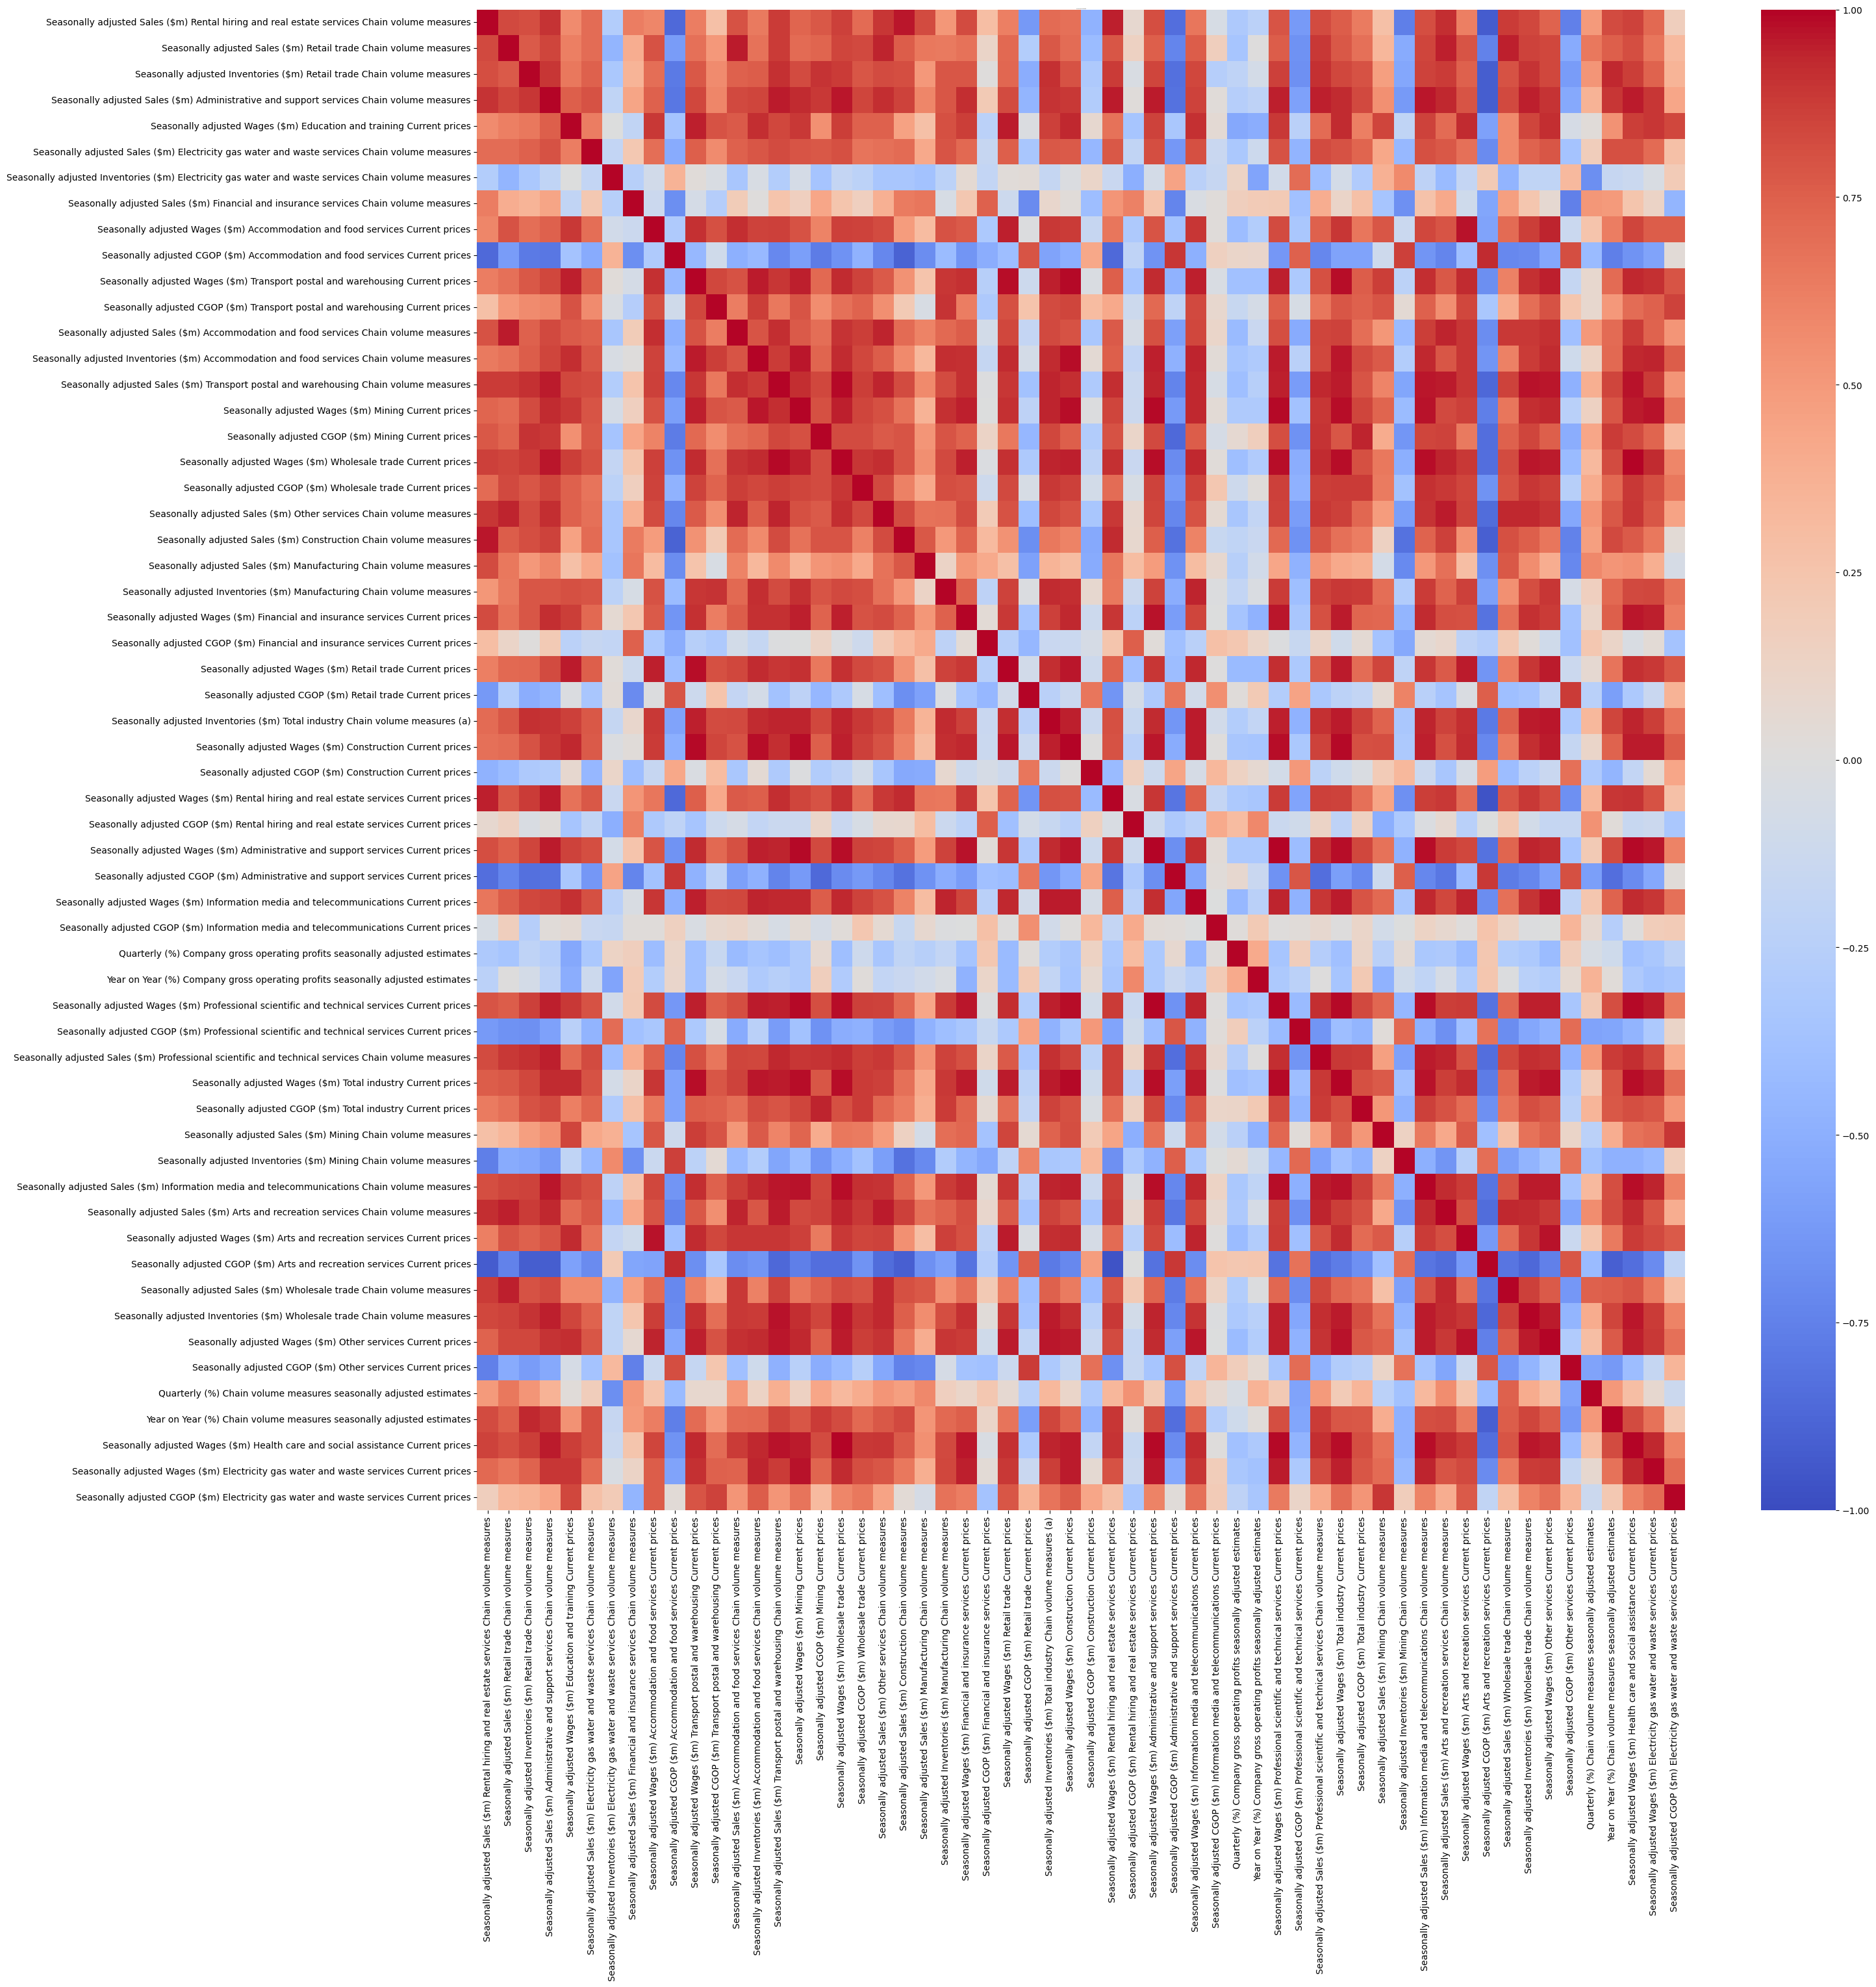

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(30, 30))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(fd.corr(), vmin=-1, vmax=1,cmap="coolwarm", annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':1}, pad=1);

1. We'll compute the **Pearson correlation coefficient (r)** for each pair of
columns.
2. We'll compute the **p-value** for the correlation of each pair of columns.
3. We'll compute (squared r) which represents the c**oefficient of determination.**
4. We'll order the results by the p-value to determine **statistical significance**, from lowest (most significant) to highest (least significant).

In [ ]:
from scipy.stats import pearsonr
import numpy as np

# Prepare a list to store the results
results = []

# Loop through each pair of columns
for col1 in fd.columns:
    for col2 in fd.columns:
        # Avoid calculating correlation for non-numeric columns or same columns
        if col1 != col2 and fd[col1].dtype in ['float64', 'int64'] and fd[col2].dtype in ['float64', 'int64']:
            # Drop NaN values for the specific pair of columns
            temp_df = fd[[col1, col2]].dropna()

            # Ensure there are enough data points to compute correlation
            if len(temp_df) > 2:
                r, p = pearsonr(temp_df[col1], temp_df[col2])
                results.append((col1, col2, r, r**2, p))

# Convert the results into a DataFrame and sort by p-value
correlation_df = pd.DataFrame(results, columns=["Column1", "Column2", "r", "r^2", "p-value"])
correlation_df = correlation_df.sort_values(by="p-value")

In [48]:
correlation_df.head(40).style.format({ 'r': '{:.2f}',
                                          'r^2': '{:.4f}',
                                          'p-value':'{:.30f}'}).background_gradient(subset=['p-value'],  #'Total Weight (%)',
                                                                                           cmap='RdYlGn', vmin=0, vmax=0.000000005622905877226454538341)

,Column1,Column2,r,r^2,p-value
951,Seasonally adjusted Wages ($m) Wholesale trade Current prices,Seasonally adjusted Wages ($m) Health care and social assistance Current prices,1.00,0.9936,0.000000000000197054080325182123
2720,Seasonally adjusted Wages ($m) Health care and social assistance Current prices,Seasonally adjusted Wages ($m) Wholesale trade Current prices,1.00,0.9936,0.000000000000197054080325182123
1940,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,Seasonally adjusted Wages ($m) Administrative and support services Current prices,0.99,0.9862,0.000000000013761926650578797209
1731,Seasonally adjusted Wages ($m) Administrative and support services Current prices,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,0.99,0.9862,0.000000000013761926650578797209
830,Seasonally adjusted Wages ($m) Mining Current prices,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,0.99,0.9835,0.000000000036996521206552410902
1923,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,Seasonally adjusted Wages ($m) Mining Current prices,0.99,0.9835,0.000000000036996521206552410902
2095,Seasonally adjusted Wages ($m) Total industry Current prices,Seasonally adjusted Wages ($m) Construction Current prices,0.99,0.9802,0.000000000101255665761612686856
1522,Seasonally adjusted Wages ($m) Construction Current prices,Seasonally adjusted Wages ($m) Total industry Current prices,0.99,0.9802,0.000000000101255665761612686856
2103,Seasonally adjusted Wages ($m) Total industry Current prices,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,0.99,0.9801,0.000000000105636866143384983528
1946,Seasonally adjusted Wages ($m) Professional scientific and technical services Current prices,Seasonally adjusted Wages ($m) Total industry Current prices,0.99,0.9801,0.000000000105636866143384983528


In [41]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# For each column in the dataframe (except the 'Date' and 'Unnamed: 0' column), add a time series line
for col in fd.columns.tolist()[0:100]:
    if col not in ['Date', 'Unnamed: 0']:
        fig.add_trace(go.Scatter(x=fd.index,
                                 y=fd[col],
                                 name=col,
                                 visible="legendonly"))  # Set visibility to 'legendonly' to turn off by default

# Set the layout for the figure
fig.update_layout(title="Economic Time Series Data",
                  xaxis_title="Date",
                  yaxis_title="Value",
                  template="plotly_white")

fig.show()


In [ ]:
fd.to_csv('/content/economic data.csv')